In [1]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import utils as np_utils

In [2]:
# Hyperparameters
num_classes = 10
batch_size = 128
epochs = 20

In [3]:
# Image Resolution
img_rows, img_cols = 28, 28
# Loading the data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Preparing the data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# Creating the Model 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])

In [6]:
# Training the Model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 22s 25ms/step - loss: 2.2887 - accuracy: 0.1384 - val_loss: 2.2541 - val_accuracy: 0.2869
Epoch 2/20
469/469 [==============================] - 9s 20ms/step - loss: 2.2317 - accuracy: 0.2520 - val_loss: 2.1816 - val_accuracy: 0.5912
Epoch 3/20
469/469 [==============================] - 9s 20ms/step - loss: 2.1554 - accuracy: 0.3734 - val_loss: 2.0803 - val_accuracy: 0.7200
Epoch 4/20
469/469 [==============================] - 9s 20ms/step - loss: 2.0453 - accuracy: 0.4749 - val_loss: 1.9365 - val_accuracy: 0.7616
Epoch 5/20
469/469 [==============================] - 9s 20ms/step - loss: 1.8978 - accuracy: 0.5397 - val_loss: 1.7483 - val_accuracy: 0.7776
Epoch 6/20
469/469 [==============================] - 9s 20ms/step - loss: 1.7199 - accuracy: 0.5841 - val_loss: 1.5272 - val_accuracy: 0.7905
Epoch 7/20
469/469 [==============================] - 9s 20ms/step - loss: 1.5274 - accuracy: 0.6207 - val_loss: 1.3021 - val_accuracy: 0.799

In [7]:
# Evaluating the Predictions on the Model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4490338861942291
Test accuracy: 0.882099986076355


In [8]:
# Saving the model for Future Inferences
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save("mnist.h5")

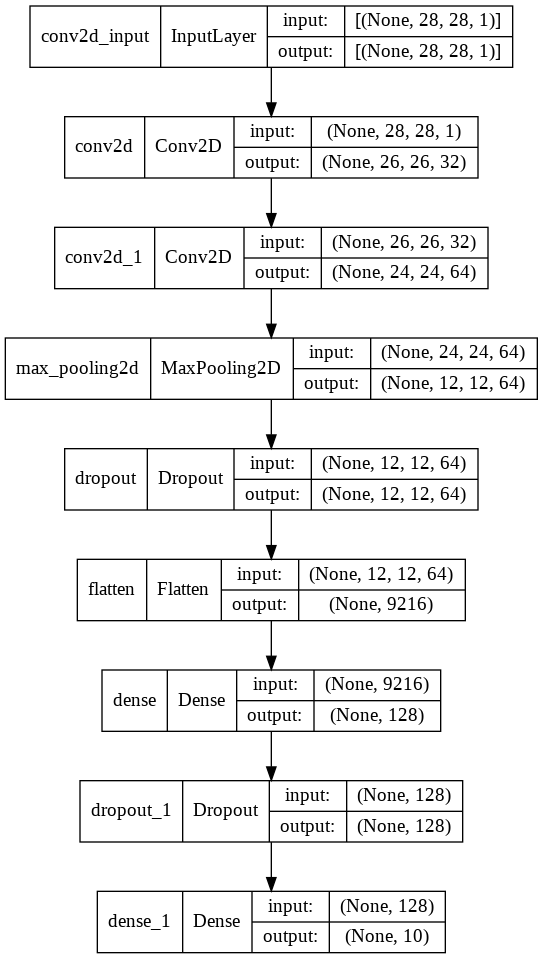

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)